In [ ]:
# encoding=utf8

# Visualization


## Introduction

In our last lesson, we took a somewhat "in depth" look at the `plot` command to get a better feel for how matplotlib's plotting functions work. In that lesson, we saw just how flexible the typical matplotlib plotting function can be. In this lesson, we'll expand our view a bit, and take a look at a few of the more common plotting functions that matplotlib provides. While we won't cover all of the plotting functions in the library, we'll hopefully cover just enough to inspire you to continue exploring everything that matplotlib has to offer. 

Let's go ahead and get started with the obligatory set of calls to set up our Jupyter notebook's environment.

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Getting the Data

In our last lesson, we created a small bit of fake data to play around with. While this can be useful when learning about a new function, it's not particularly interesting or satisfying. In this lesson, we'll explore a few more of the plotting functions that matplotlib provides, but this time we'll use some real world data to explore those functions. The data set that we're going to use is the (in)famous [Iris data set][1] introduced by the English statistician [Ronald Fisher][2] in his 1936 paper on [Linear Discriminant Analysis][3]. 

[1]: https://en.wikipedia.org/wiki/Iris_flower_data_set
[2]: https://en.wikipedia.org/wiki/Ronald_Fisher
[3]: https://en.wikipedia.org/wiki/Linear_discriminant_analysis

The Iris data set has been used in a multitude of papers and tutorials and comes with many data visualization and statistical packages. Since we're not currently using any of those packages though, we'll have to get the data ourselves once again from the [UCI Machine Learning Repository][4]. The code below is nearly identical to the code used in our earlier EDA lesson, but to give you a quick refresher, all it does is download the data from the repository and load it into a variable called `data`. And, just like in that last lesson, I've once again included the data file for your use if you can't download it directly from the UCI Repository. You can find the file at `./data/iris_data.csv`.

[4]: https://archive.ics.uci.edu/ml/datasets/Iris

In [20]:
!pwd

/Users/bater.makhabel/WorkSpace/MyStartups/AITrainingSchool/GitBase/Python/Visualization


In [22]:
import csv
#import urllib2
import urllib.request
from collections import namedtuple

# Create a namedtuple constructor for each record in the Iris data
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris-setosa
#       -- Iris-versicolour
#       -- Iris-virginica
fields = ('sepal_length', 
          'sepal_width', 
          'petal_length', 
          'petal_width', 
          'species')
IrisRecord = namedtuple('IrisRecord', fields)

# Download and read in the data from the UCI Machine Learning Repository
response = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
iris_data_csv = response.read().strip()
    
# Convert each record into a format that's easier to work with (i.e.,
# wrap each record in the namedtuple that we created).
data = []
for row in csv.reader(iris_data_csv.splitlines()):
    data.append(IrisRecord(
        sepal_length          = float(row[0]),
        sepal_width           = float(row[1]),
        petal_length          = float(row[2]),
        petal_width           = float(row[3]),
        species               = row[4]))

Error: iterator should return strings, not bytes (did you open the file in text mode?)

## The Boxplot

We're going to begin our exploration of our data with the [boxplot][1], one of the most useful visualization techniques for quickly getting an overview of the "spread" of numerical features within a data set. A boxplot splits the data from each feature into quartiles. The "box" in a boxplot, shows what is known as the [interquartile range (IQR)][2], which sounds complex, but is really just a fancy way of saying the middle 50%. Inside the box, you'll typically find a line that represents the median value of that feature. Above and below the box, are "whiskers" (or, pairs of lines that extend outward from the box) that show the boundaries of the upper and lower 25%. Finally, outliers are typically visualized by a set of points that lie just beyond the whiskers and represent each individual outlier in the graph.

[1]: https://en.wikipedia.org/wiki/Box_plot
[2]: https://en.wikipedia.org/wiki/Interquartile_range

The `pyplot` interface provides a function called, appropriately, `boxplot` that takes a 2-dimensional array of numerical data and draws one boxplot for each column in the array. In the following code, we will use the `numpy.column_stack` function to stitch together data into a 2D array. Then we'll call the `boxplot` function with the newly formatted data. In the call, we will also pass in a dictionary with formatting information using the `flierprops` parameter---incidentally, "fliers" is the term matplotlib uses for outliers in the graph. This will give you a taste of just how easy it is to fine tune the look of your boxplot. Finally, we'll change the `x-axis` ticks to the names of each feature that we are showing in the plot.

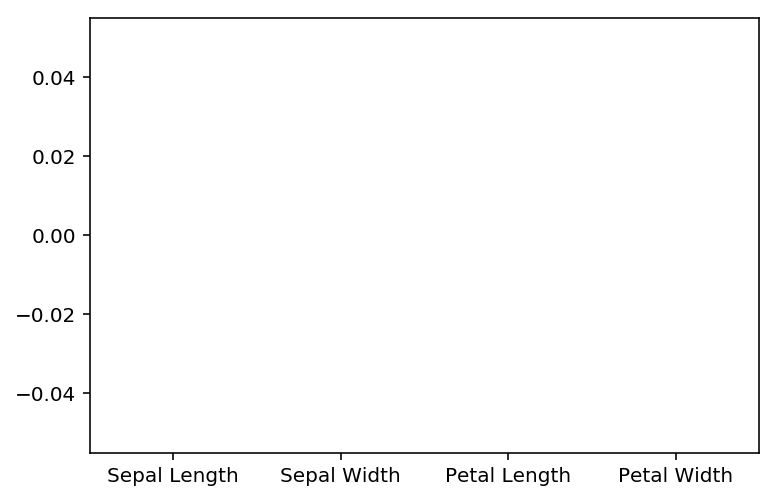

In [9]:
# Convert the Iris data into a 2-dimensional matrix 
# where each column is one feature in the data set.
x = np.column_stack([
    [r.sepal_length for r in data],
    [r.sepal_width for r in data],
    [r.petal_length for r in data],
    [r.petal_width for r in data],
])

# Plot the data. We are changing the look of the outliers (aka, fliers),
# one of the many configurable bits of the boxplot.
plt.boxplot(x, flierprops={'marker':'o',                    # Mark outliers with a circle
                           'markerfacecolor':'none',        # Empty circles (i.e., no color) 
                           'color': 'none',                 # Remove the outlier lines
                           'markersize':3})                 # Reduce the size of the ourlier markers

# Add the x-axis labels offset by 1 so they line up with
# each of the box plots.
names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
plt.xticks(range(1, len(names)+1), names);

## Creating a Color Map

In the next few plots we'll be color coding the data according to its species, and though we don't really care what color each species ends up as, we do care that the color used is consistent throughout the rest of the plots. The next little bit of code uses the default list of colors that matplotlib typically cycles through, and the uber-useful [`defaultdict`][1] data structure to create a simple color map that we can use throughout the rest of this lesson.

[1]: https://docs.python.org/2/library/collections.html#collections.defaultdict

In [5]:
from itertools import cycle
from collections import defaultdict

# Create a color map of species names to colors
color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
cmap = defaultdict(lambda: next(color_cycler)['color'])

## The Scatterplot

A really great tool for visualizing the relationships between features in our data is the [scatterplot][1]. A scatterplot graphs data using [cartesian coordinates][2] (i.e., `x` and `y` values), where each axis in the graph represents a different feature in the data. Plotting your data on a scatterplot allows you to quickly see relationships between features in your data set, and also visually pick out clusters as we'll see in our examples below. 

[1]: https://en.wikipedia.org/wiki/Scatter_plot
[2]: https://en.wikipedia.org/wiki/Cartesian_coordinate_system

To see an example of matplotlib's `scatter` function in action, we'll be plotting the sepal length and width against one another for our first example, and the petal length and width against each other for the second. The `scatter` function expects two lists: the first contains the `x-axis` values, and the second the `y-axis` values. So, the first thing we need to do is create a list containing the sepal lengths and another containing the widths. We also want to draw each point in the graph in a color specific to its species, so we'll also create a third list containing the color for each of the `x` and `y` pairs. Lines 4-8 below create each of these lists by simply iterating through each observation in the data and appending the length, width, and color (according to the species) to the appropriate list.

When we call the `scatter` function we'll set the `color` parameter to `'none'` and the `edgecolors` parameter to our list of colors. Doing so will make each point in the graph an empty circle outlined by the color in the `edgecolors` list. We'll also reduce the size of each circle's outline using the `linewidths` parameter to make the plot a little more aesthetically pleasing. Next, we'll set the `x` and `y` labels to make the graph a bit easier to understand. Finally, we'll create a legend so we can see which species each data point belongs to in our graph. 

### Legends and "Proxy Artists"

Calling the `legend` function without passing in any parameters will create a legend that contains an entry for every observation in our data that has a label attached to it. We don't currently have any of our data points labeled, and doing so would be a bit tough without calling the `scatter` function three different times---one for each species in our data set. To create our legend then, we will need to create a set of what matplotlib calls ["proxy artists"][3] that are data points that are used only for the creation of a legend and do not actually exist in our graph. Lines 27-31 create a list of "proxy artists". Then, on line 33 we pass that list into the `legend` function to create a legend with an entry for each species in our data set.

[3]: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

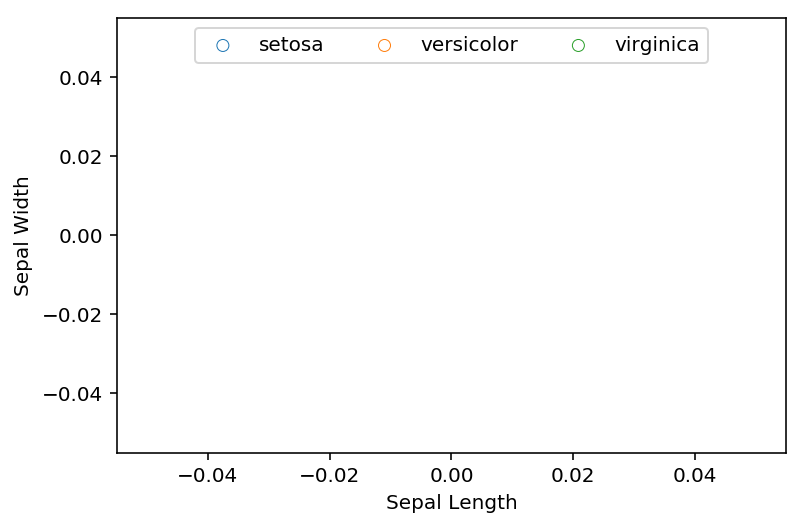

In [6]:
# Extract the x and y values (i.e., sepal length and width)
# from the data set. Also, create a list of corresponding
# colors based on the species of each record.
sepal_length, sepal_width, colors = [], [], []
for r in data:
    sepal_length.append(r.sepal_length)
    sepal_width.append(r.sepal_width)
    colors.append(cmap[r.species])
    
# Plot the data on a scatter plot. Each point will have an outline 
# color according to their species, but we'll leave the centers 
# colorless (for aesthetic purposes only). Finally, we'll reduce
# the line width of each data point (again for aesthetics only).
plt.scatter(sepal_length, sepal_width, edgecolors=colors, c='none', linewidths=0.5)

# Add x and y labels
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Create a few "proxy artists" for creating the legend. Calling the 
# legend() function without passing in any parameters will create a
# legend for any labeled data in the graph, so we could do something
# funky where we add a label for one line per species, but that 
# doesn't seem as simple and clean as just creating a few lines that
# we use just to create the legend. Plus, this is an officially 
# sanctioned way to create a legend (just see the legend docs).
legend_handles = [
    plt.scatter([], [], marker='o', label='setosa', edgecolors=cmap['Iris-setosa'], c='none', linewidths=0.5),
    plt.scatter([], [], marker='o', label='versicolor', edgecolors=cmap['Iris-versicolor'], c='none', linewidths=0.5),
    plt.scatter([], [], marker='o', label='virginica', edgecolors=cmap['Iris-virginica'], c='none', linewidths=0.5)
]

plt.legend(handles=legend_handles, scatterpoints=1, ncol=3, loc='upper center');

In the scatterplot above, we can see a somewhat positive relationship between the sepal length and the width, especially within the Iris-setosa species. We can also see a definite division between the setosa species and the other two species. Assuming we wanted to create a model for classifying each flower according to their species, we could use the sepal dimensions, but that would really only give us a good model for classifying the setosa species versus everything else. So, perhaps we should keep exploring.

In the next example, we'll create another scatterplot, this time, however, we're going to plot the petal length against its width. We'll also move the legend around a bit so as to not obscure any of our data, but other than that, the next example is nearly identical to the previous one.

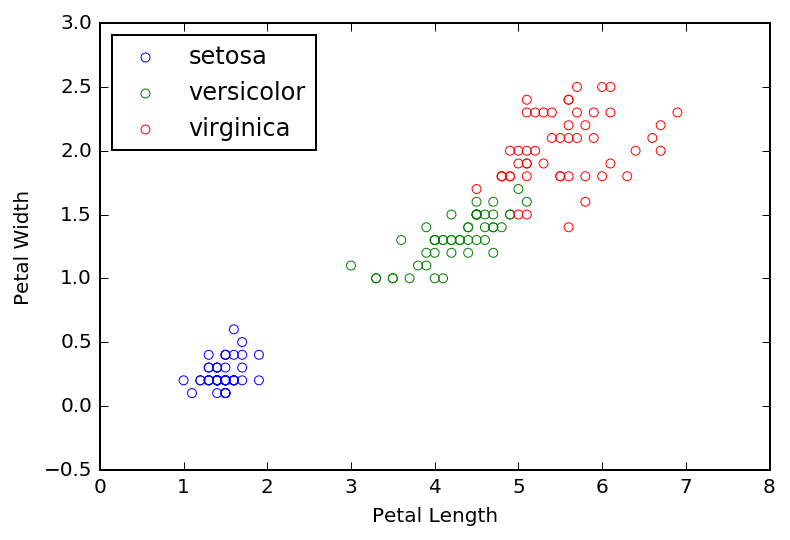

In [6]:
# Extract the x and y values (i.e., petal length and width)
# from the data set. Also, create a list of corresponding
# colors based on the species of each record.
petal_length, petal_width, colors = [], [], []
for r in data:
    petal_length.append(r.petal_length)
    petal_width.append(r.petal_width)
    colors.append(cmap[r.species])
    
# Plot the data on a scatter plot. Each point will have an outline 
# color according to their species, but we'll leave the centers 
# colorless (for aesthetic purposes only). Finally, we'll reduce
# the line width of each data point (again for aesthetics only).
plt.scatter(petal_length, petal_width, edgecolors=colors, c='none', linewidths=0.5)

# Add x and y labels
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Create a few "proxy artists" for creating the legend. Calling the 
# legend() function without passing in any parameters will create a
# legend for any labeled data in the graph, so we could do something
# funky where we add a label for one line per species, but that 
# doesn't seem as simple and clean as just creating a few lines that
# we use just to create the legend. Plus, this is an officially 
# sanctioned way to create a legend (just see the legend docs).
legend_handles = [
    plt.scatter([], [], marker='o', label='setosa', edgecolors=cmap['Iris-setosa'], c='none', linewidths=0.5),
    plt.scatter([], [], marker='o', label='versicolor', edgecolors=cmap['Iris-versicolor'], c='none', linewidths=0.5),
    plt.scatter([], [], marker='o', label='virginica', edgecolors=cmap['Iris-virginica'], c='none', linewidths=0.5)
]

plt.legend(handles=legend_handles, scatterpoints=1, loc='upper left');

In the plot above we now see a definitively positive correlation between the petal width and length. In all species, as the length of the petal increases, so too does its width. Also, we can see a better division between the species this time. Setosa, as before, is linearly separable from the other two species, but you now no longer see as much overlap with the versicolor and virginica species as we did when looking at the scatterplot for the sepal dimensions. So, this looks like a better set of features to use if we wanted to create a model for classifying our data.

## The Histogram

Next up is the [histogram][1], a wonderful tool for visualizing the distribution of numerical data. In the next example we'll use matplotlib's `hist` function to analyze the distribution of one of the features in the Iris data set. For those unfamiliar, a histogram "bins" its given data, i.e., it will divide the data up into several intervals, and then count the number of observations in each bin. The `hist` function also takes a parameter called `histtype` that allows us to describe the type of histogram we want to create. Since we want to see how the data for each species is distributed, we'll choose the `'barstacked'` histogram and pass in a list of colors: one color per species. 

The code below creates three lists to hold the petal length for each species of flower. then we create the corresponding list of colors. Finally, we pass everything into the `hist` function along with the `histtype` parameter and the number of bins we want to divide our data into. Incidentally, the default number of bins in a histogram is 10, but you can always increase the number of bins for a more granular view of your data. Doing so can sometimes surface  interesting insights, so it's generally a good idea to play around with the number of bins a bit to see what effect it has on the distribution of your data.

[1]: https://en.wikipedia.org/wiki/Histogram

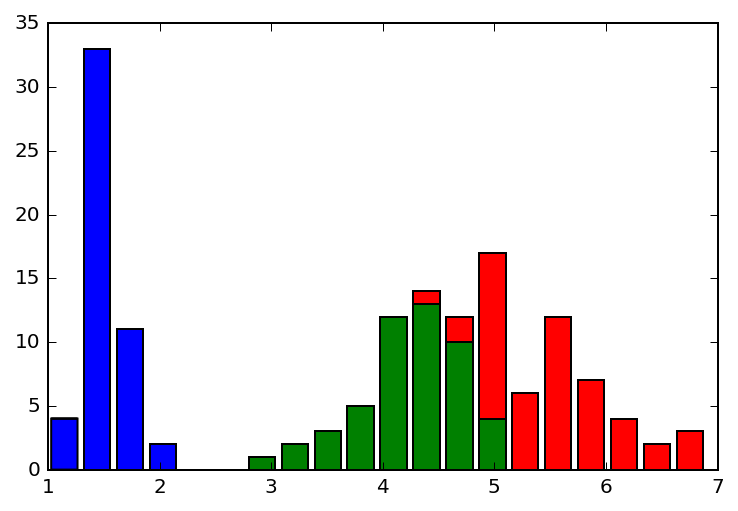

In [7]:
# Split the data set up into one list per species
setosa = [r.petal_length for r in data if r.species == 'Iris-setosa']
versicolor = [r.petal_length for r in data if r.species == 'Iris-versicolor']
virginica = [r.petal_length for r in data if r.species == 'Iris-virginica']

# Create a list of colors (one per species)
colors = [cmap['Iris-setosa'], cmap['Iris-versicolor'], cmap['Iris-virginica']]

# Plot a stacked histogram
plt.hist([setosa, versicolor, virginica], color=colors, histtype='barstacked', bins=20);

In the histogram above, we can again see the division we saw earlier between the setosa species and everything else. One thing that's interesting is that the other species look to be somewhat normally distributed around a length of 5, but with the versicolor species falling mainly left of the center, and the virginica species falling to its right.

## Conclusion

And that will bring us to the end of this lesson. Though we didn't have time to cover all of the different visualization types, we did go over quite a few, and we discussed how each can be useful when doing a bit of exploratory analysis on a data set. Hopefully, this short introduction has piqued your interest enough to get you exploring all of the [visualization functions][1] that the matplotlib provides.

[1]: http://matplotlib.org/api/pyplot_summary.html